In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,precision_score,f1_score,recall_score
from json import dump


In [4]:
df=pd.read_csv("../data/data.csv")

In [5]:
df.head()

,age,gender,antecedents,headaches,seizures,fatigue,drowsiness,sleep_mb,memory_mb,pressure,balance_loss,judgment_degradation,sense_degradation,lactation,swallowing,muscle,Tumor
0,36,M,1,1,C,1,1,2,1,3,1,1,3,2,2,1,1
1,47,M,1,2,M,1,1,1,2,3,1,3,2,0,3,3,1
2,35,F,3,1,C,1,1,1,0,1,0,1,3,0,0,2,1
3,55,M,0,2,M,1,1,0,0,3,1,1,3,0,3,3,1
4,71,F,3,2,M,2,1,0,1,0,1,1,3,2,0,2,1


In [6]:
df.shape


(20000, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   20000 non-null  int64 
 1   gender                20000 non-null  object
 2   antecedents           20000 non-null  int64 
 3   headaches             20000 non-null  int64 
 4   seizures              20000 non-null  object
 5   fatigue               20000 non-null  int64 
 6   drowsiness            20000 non-null  int64 
 7   sleep_mb              20000 non-null  int64 
 8   memory_mb             20000 non-null  int64 
 9   pressure              20000 non-null  int64 
 10  balance_loss          20000 non-null  int64 
 11  judgment_degradation  20000 non-null  int64 
 12  sense_degradation     20000 non-null  int64 
 13  lactation             20000 non-null  int64 
 14  swallowing            20000 non-null  int64 
 15  muscle                20000 non-null

In [8]:
df.isnull().sum().sum()

np.int64(0)

In [9]:
df.duplicated().sum()

np.int64(1)

In [10]:
df.Tumor.value_counts()

Tumor
1    10000
0    10000
Name: count, dtype: int64

In [11]:
# Encodage
encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])
df['seizures'] = encoder.fit_transform(df['seizures'])

In [12]:
df.head()

,age,gender,antecedents,headaches,seizures,fatigue,drowsiness,sleep_mb,memory_mb,pressure,balance_loss,judgment_degradation,sense_degradation,lactation,swallowing,muscle,Tumor
0,36,1,1,1,0,1,1,2,1,3,1,1,3,2,2,1,1
1,47,1,1,2,1,1,1,1,2,3,1,3,2,0,3,3,1
2,35,0,3,1,0,1,1,1,0,1,0,1,3,0,0,2,1
3,55,1,0,2,1,1,1,0,0,3,1,1,3,0,3,3,1
4,71,0,3,2,1,2,1,0,1,0,1,1,3,2,0,2,1


In [13]:
X,y=df.drop('Tumor',axis=1),df['Tumor']

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
log=LogisticRegression(
    penalty="l2",
    C=0.5,
    solver="lbfgs",
    max_iter=1000,
    random_state=42
)
log.fit(X_train,y_train)
preds=log.predict(X_test)
probas=log.predict_proba(X_test)

In [17]:
print(classification_report(y_test,preds))
print(confusion_matrix(y_test,preds))
print(accuracy_score(y_test,preds))
print(roc_auc_score(y_test,probas[:,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1981
           1       1.00      1.00      1.00      2019

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

[[1981    0]
 [   4 2015]]
0.999
0.9999837485333052


In [18]:
result={
    'accuracy':accuracy_score(y_test,preds),
    'precision':precision_score(y_test,preds),
    'recall':recall_score(y_test,preds),
    'f1_score':f1_score(y_test,preds),
    }
with open('../reports/ml/result.json','w') as f:
    dump(result,f)

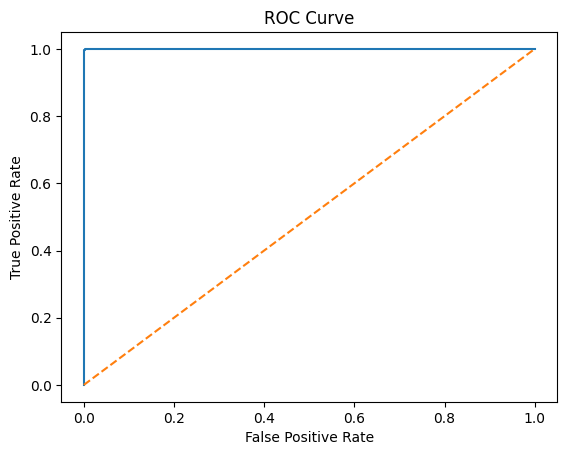

In [19]:
fpr,tpr,thresholds=roc_curve(y_test,probas[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.savefig('../reports/ml/roc_curve.png')
plt.show()

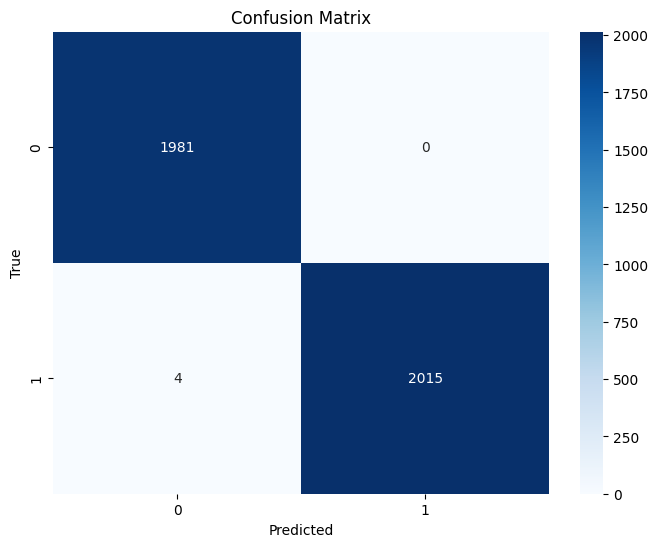

In [20]:
cm = confusion_matrix(y_test,preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('../reports/ml/confusion_matrix.png')
plt.show()